# kMeans - 色彩分類

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import accuracy_score

data = pd.read_csv("./dataset/xclara.csv")
data.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


In [21]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [22]:
f1 = data['V1'].values
f2 = data['V2'].values

In [23]:
X = np.array(list(zip(f1, f2)))

In [24]:
kmeans = KMeans(n_clusters=5)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)

centroids = kmeans.cluster_centers_

print('centroids: {}'.format(centroids))
print('prediction on each data: {}'.format(labels))

centroids: [[ 32.2677129   58.70151234]
 [ 77.45007318 -15.22893816]
 [  9.35029477  10.63837167]
 [ 48.44808704  60.51823211]
 [ 63.51825263  -5.81470372]]
prediction on each data: [2 2 2 ... 4 1 1]


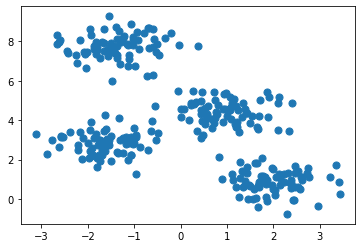

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

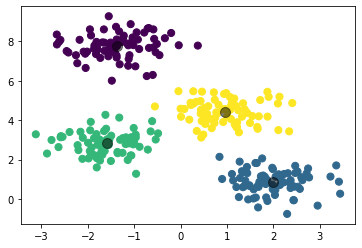

In [26]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5);

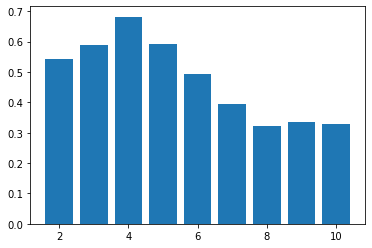

[0.5426422297358302, 0.5890390393551768, 0.6819938690643478, 0.5923875148758644, 0.49385646108711256, 0.39533144164822037, 0.32232199977558923, 0.3363161948599787, 0.32813482357562423]


In [27]:
from sklearn import metrics
import matplotlib.pyplot as plt

# 迴圈
silhouette_avgs = []
ks = range(2, 11)
for k in ks:
    kmeans_fit = KMeans(n_clusters = k).fit(X)
    cluster_labels = kmeans_fit.labels_
    silhouette_avg = metrics.silhouette_score(X, cluster_labels)
    silhouette_avgs.append(silhouette_avg)

# 作圖並印出 k = 2 到 10 的績效
plt.bar(ks, silhouette_avgs)
plt.show()
print(silhouette_avgs)